##### Importing Necessary Libraries

In [2]:
import torch
from torchvision import datasets,transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

##### Downloading CIFAR-10 Dataset

In [3]:
transform = transforms.Compose([transforms.Resize((32,32)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

train_set = datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
test_set = datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
print('Training set samples:', len(train_set))
print('Test set samples:', len(test_set))

Training set samples: 50000
Test set samples: 10000


##### Splitting dataset into train and test set 

In [5]:
# Getting numpy data
X_train  = train_set.data
#Converting to tensor for autograd
X_train = torch.from_numpy(X_train) 

# Getting numpy data
X_test  = test_set.data
#Converting to tensor for autograd
X_test = torch.from_numpy(X_test)

#Separating labels 
Y_train = np.array(train_set.targets)
Y_train = Y_train.tolist()
Y_test  = np.array(test_set.targets)
Y_test = Y_test.tolist()

# flatten out all images to be one-dimensional
X_train_rows = X_train.reshape(X_train.shape[0], 32 * 32 * 3)  # converting to row vector 
X_test_rows = X_test.reshape(X_test.shape[0], 32 * 32 * 3)     # converting to row vector

In [6]:
print("X_train type: ", type(X_train_rows))
print("X_test type: ", type(X_test_rows))
print('Y_train size: ',len(Y_train))
print('Type of Y_train: ',type(Y_train))
print('Printing a single element of Y_train: ',Y_train[3])
print("Type of that sample: ",type(Y_train[3]))

X_train type:  <class 'torch.Tensor'>
X_test type:  <class 'torch.Tensor'>
Y_train size:  50000
Type of Y_train:  <class 'list'>
Printing a single element of Y_train:  4
Type of that sample:  <class 'int'>


##### Normalizing the Train and Test data

In [12]:
# Normalize function

def normalize_data(data):
    normalize_set =[]
    for i in range(len(data)):
        s = data[i]/ 255
        normalize_set.append(s)
    normalize_data = np.vstack(normalize_set)
    normalize_data = torch.from_numpy(normalize_data)
    return normalize_data

In [13]:
# Normalizing train set
X_train_set = normalize_data(X_train_rows)
print('Total number of train data: ',len(X_train_set))
print('Single data of normalize train set: ', X_train_set[1])
print()

#Normalizing test set
X_test_set = normalize_data(X_test_rows)
print('Total number of test data: ',len(X_test_set))
print('Single data of normalize test set: ', X_test_set[1])

Total number of train data:  50000
Single data of normalize train set:  tensor([0.6039, 0.6941, 0.7333,  ..., 0.5608, 0.5216, 0.5647])

Total number of test data:  10000
Single data of normalize test set:  tensor([0.9216, 0.9216, 0.9216,  ..., 0.7294, 0.7843, 0.7804])


##### SVM Loss function

In [34]:
# Defining SVM Loss function

def svm_loss(train_image,true_label,weights, bias):
    zeros = torch.zeros(50000, 10) #50000 10
    scores = torch.matmul(train_image, weights) + bias
    #scores = scores_i   # taking gd at scores_i
    #scores = scores.detach()
    margins = torch.maximum(zeros, scores - scores[true_label] + 1)
    margins[true_label] = 0
    #margins.requires_grad= True #
    loss_i = torch.sum(margins)
    #loss_i.requires_grad=True
    loss = loss_i #
    
    loss = loss.detach().numpy()
    print("Loss: ", loss) #
    return loss_i


##### Training the model

In [35]:
import random
random.seed(0)

w = torch.randn(3072, 10, requires_grad= True)  # 3072 * 10
b = torch.randn(10, requires_grad=True)         # 1* 10 
print("Our initial weight: ",w)                 # AS our output will be (1* 10) 

Our initial weight:  tensor([[ 0.5179,  0.9622,  0.5089,  ...,  1.4532,  1.9260, -0.4398],
        [-0.2948, -0.2582,  0.8693,  ..., -0.0578, -0.4950, -0.2181],
        [-0.1482,  0.2495, -1.3956,  ..., -0.9703, -0.6316,  0.2857],
        ...,
        [ 0.1817, -0.4370, -0.5525,  ..., -0.1889, -0.0930,  1.1420],
        [ 0.2436, -0.3654, -0.2434,  ..., -0.6440,  0.0402,  0.7841],
        [-0.7532,  0.1756,  0.4787,  ...,  2.0690,  0.6737, -0.1464]],
       requires_grad=True)


In [36]:
import random
random.seed(0)

w = torch.randn(3072, 10, requires_grad= True)                # 3072 * 1000
b = torch.randn(10, requires_grad=True)

lr = 0.0001

for epoch in range(50):
    loss = svm_loss(X_train_set, Y_train, w, b)
    loss.backward()
    
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        
        w.grad.zero_()
        b.grad.zero_()
        

Loss:  3656264.5
Loss:  8074983.0
Loss:  3636469.5
Loss:  1133131.1
Loss:  1225288.9
Loss:  566296.06
Loss:  255025.95
Loss:  164251.38
Loss:  103797.3
Loss:  88101.19
Loss:  77873.16
Loss:  69808.96
Loss:  63143.24
Loss:  57485.477
Loss:  52623.81
Loss:  48368.953
Loss:  44647.438
Loss:  41358.19
Loss:  38440.984
Loss:  35847.977
Loss:  33528.598
Loss:  31441.73
Loss:  29566.941
Loss:  27875.072
Loss:  26329.527
Loss:  24906.004
Loss:  23599.012
Loss:  22398.602
Loss:  21288.95
Loss:  20270.299
Loss:  19340.092
Loss:  18484.246
Loss:  17690.094
Loss:  16954.496
Loss:  16272.031
Loss:  15628.586
Loss:  15020.721
Loss:  14449.101
Loss:  13919.974
Loss:  13423.299
Loss:  12956.994
Loss:  12515.834
Loss:  12100.1
Loss:  11711.197
Loss:  11344.583
Loss:  10996.366
Loss:  10666.967
Loss:  10355.029
Loss:  10060.111
Loss:  9781.148


In [37]:
print("Weight fter training: \n", w)

Weight fter training: 
 tensor([[ 0.8738, -0.5664, -0.6777,  ...,  0.4744, -0.9237,  1.0678],
        [-0.9302, -1.4637, -0.0736,  ...,  1.0908,  0.3745,  0.3727],
        [-0.8294,  0.3955,  0.0128,  ...,  0.2695,  0.8987, -0.5189],
        ...,
        [-0.3253, -1.4742, -0.6827,  ..., -1.7655,  1.3248, -1.1122],
        [-0.0497,  0.9328, -0.8306,  ...,  0.8911,  0.0241, -0.7474],
        [ 0.8313, -0.1167, -0.0324,  ..., -0.5633,  0.0393, -0.8691]],
       requires_grad=True)


##### Accuracy and confuision matrix

In [38]:
# Forward pass()
scores = torch.matmul(X_test_set[1], w) + b
print('Scores: ',scores)
a = torch.zeros(1)
margins = torch.maximum(a, scores - scores[Y_test[1]] + 1)
margins[Y_test[1]] = 0
loss_i = torch.sum(margins)
print('Loss:',loss_i)

Scores:  tensor([-26.5509, -29.5732, -16.1433, -11.2018, -34.0258,  -8.3928,  -8.2277,
         -9.1762, -21.8892, -15.9507], grad_fn=<AddBackward0>)
Loss: tensor(68.2428, grad_fn=<SumBackward0>)


In [39]:
def forward(test_set, weights, bias):
    some_list = []
    for i in range(len(test_set)):
        score = torch.matmul(test_set[i], weights) + bias
        prb = torch.argmax(score, dim = 0)
        prb = prb.detach().numpy().tolist()
        some_list.append(prb)
        
    return some_list

In [41]:
# Forward pass
predict = forward(X_test_set, w, b)
print(len(predict))
print()
for i in range(10):
    print(predict[i])

10000

2
6
2
2
3
0
7
1
2
5


In [42]:
#printing the accuracy 
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test, predict)
print('Accuracy is: ', ac )

Accuracy is:  0.0952


In [43]:
def accuracy_calculate(true_class, pred_class):
    a = 0
    for i in range(len(true_class)):
        if true_class[i] == pred_class[i]:
            a += 1
            
    accuracy = (a / len(pred_class)) * 100
    return accuracy 

In [44]:
# Accuracy
acc = accuracy_calculate(Y_test, predict)
print(acc)   #Cholbe

9.520000000000001


Class Labels:  {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


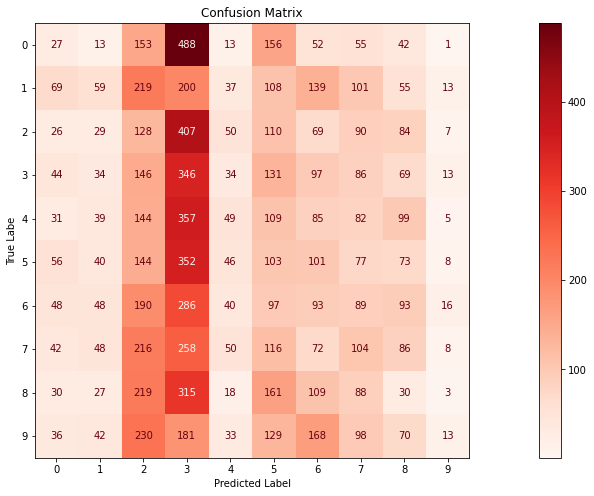

In [90]:
# Confuision matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}
print('Class Labels: ',classes)

cm = confusion_matrix(Y_test, predict) 
disp = ConfusionMatrixDisplay(cm) 
disp = disp.plot(cmap= plt.cm.Reds) 
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Labe')
plt.gcf().axes[0].tick_params(colors= 'black')
plt.gcf().axes[1].tick_params(colors= 'black')
plt.gcf().set_size_inches(25, 8)

plt.show()

##### Convert Weights into images

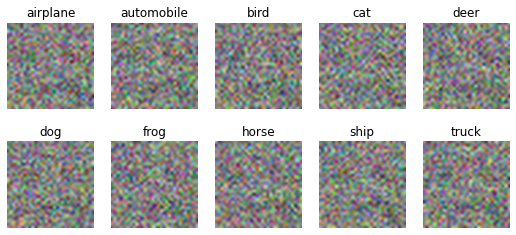

In [92]:
#Converting weights into images 
weight = w.detach().numpy()
#print(weight.shape)
#print(type(weight))
weight = weight.reshape(32, 32, 3, 10)
#print(weight[1].shape)
weight_max, weight_min = np.max(weight), np.min(weight)
#print(weight_max, weight_min)
fig = plt.figure(figsize= (9,4))

label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    plt.subplot(2, 5, i+1)
    image = 255* (weight[:, :, :, i].squeeze() - weight_max) / (weight_max - weight_min)
    plt.imshow(image.astype('uint8'), interpolation = 'lanczos', cmap = 'viridis')
    plt.axis('off')
    plt.title(label[i])